In [1]:
import urllib.request
import pandas as pd

In [2]:
#Checkout-Daten über die API beziehen und als CSV-Datei speichern

url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f8eea379670>)

In [3]:
#In einen DataFrame laden und analysieren

checkouts_df = pd.read_csv(checkout_file)

In [4]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016
9996,Digital,OverDrive,EBOOK,2018,1,1,The Book of Summer: A Novel,Michelle Gable,"Fiction, Historical Fiction, Literature",Macmillan Publishers,2017
9997,Physical,Horizon,BOOK,2018,1,1,Revival / Stephen King.,"King, Stephen, 1947-","Drug addicts Fiction, Clergy Fiction, Rock mus...","Thorndike Press,",2014.
9998,Physical,Horizon,BOOK,2018,1,4,Loula is leaving for Africa / written and illu...,"Villeneuve, Anne, 1966-","Imagination Juvenile fiction, Chauffeurs Juven...","Kids Can Press,",[2013]


In [5]:
checkouts_df.shape

(10000, 11)

In [6]:
checkouts_df["checkoutmonth"].unique()

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12])

In [7]:
checkouts_df["creator"].unique()

array(['Vince Flynn', nan, 'Mavericks (Musical group)', ...,
       'Michelle Gable', 'Villeneuve, Anne, 1966-', 'Marjorie Flack'],
      dtype=object)

Frage 1: Wie häufig wurden Werke von Leo Tolstoy ausgeliehen?  

In [9]:
checkouts_df[checkouts_df["creator"] == "Leo Tolstoy"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
8050,Digital,OverDrive,EBOOK,2018,1,2,War and Peace,Leo Tolstoy,"Classic Literature, Fiction, Literature","Random House, Inc.",2012


In [10]:
checkouts_tolstoy_df = checkouts_df[checkouts_df["creator"] == "Leo Tolstoy"]

In [12]:
checkouts_df [(checkouts_df["creator"] == "Leo Tolstoy")][["checkouts"]].groupby("checkouts").agg({"checkouts": ["sum"]})

,checkouts
,sum
checkouts,
2,4


In [14]:
%matplotlib inline

array([[<AxesSubplot:title={'center':"('checkouts', 'sum')"}>]],
      dtype=object)

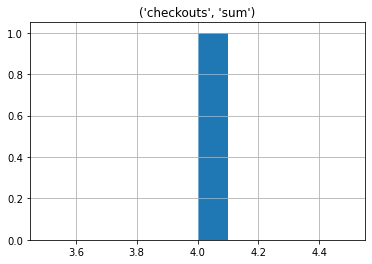

In [15]:
checkouts_tolstoy_df[["checkouts"]].groupby("checkouts").agg({"checkouts": ["sum"]}).hist()

Frage 2: Aus welchem Publikationsjahr wurden die meisten und die wenigsten Medien entliehen?

In [16]:
checkouts_df["publicationyear"].value_counts()

2017              479
[2017]            418
2013              416
2014              343
[2016]            324
                 ... 
c1976-              1
1964.               1
c1985-              1
c1989-<c1994 >      1
©2008.              1
Name: publicationyear, Length: 264, dtype: int64

In [17]:
%matplotlib inline


<AxesSubplot:ylabel='publicationyear'>

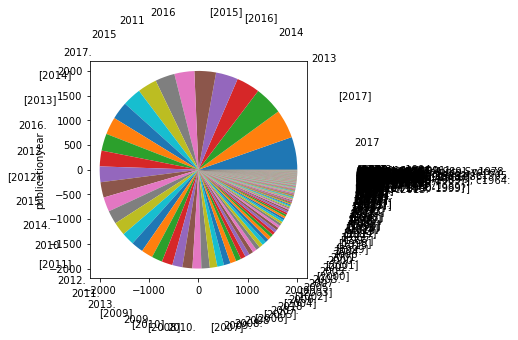

In [21]:
checkouts_df["publicationyear"].value_counts().plot(kind="pie", radius=2000, frame=True, labeldistance = 1.6)

Frage 3: Wie häufig wurden gedruckte Bücher im Vergleich zu eBooks ausgeliehen?

In [22]:
checkouts_df[(checkouts_df["materialtype"] == "EBOOK")|(checkouts_df["materialtype"] == "BOOK")][["materialtype", "checkouts"]]


,materialtype,checkouts
0,EBOOK,22
3,EBOOK,2
4,EBOOK,1
5,EBOOK,1
6,EBOOK,2
...,...,...
9993,BOOK,1
9994,EBOOK,1
9996,EBOOK,1
9997,BOOK,1


In [23]:
checkouts_books_ebooks_df = checkouts_df[(checkouts_df["materialtype"] == "BOOK")
      |(checkouts_df["materialtype"] == "EBOOK")][["materialtype", "checkouts"]]

In [24]:
checkouts_books_ebooks_df.groupby("materialtype").sum()

,checkouts
materialtype,
BOOK,14180
EBOOK,5783


In [25]:
%matplotlib inline

<AxesSubplot:xlabel='materialtype'>

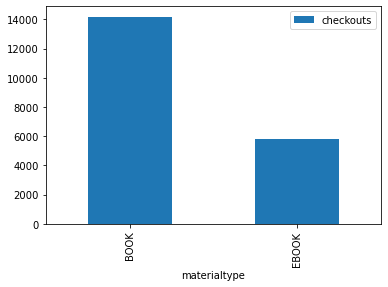

In [26]:
checkouts_books_ebooks_df.groupby("materialtype").sum().plot(kind="bar")